In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [79]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment (3).csv


In [80]:
df=pd.read_csv('/content/CarPrice_Assignment.csv')
print('shape of data',df.shape)
df.columns

shape of data (205, 26)


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [81]:
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [83]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [84]:
#check for missing value
total_null=df.isna().sum()
percentage=total_null/df.shape[0]*100
print(percentage)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64


In [85]:
#check for duplicate
df.duplicated().sum()

np.int64(0)

In [86]:
#seperate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

Numerical columns: Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
Categorical columns: Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


In [87]:
#find outliers except price
Q1=df[num_cols].quantile(0.25)
Q2=df[num_cols].quantile(0.50)
Q3=df[num_cols].quantile(0.75)
IQR=Q3-Q1
outlier_counts = {}
for col in num_cols:
  if col not in ['price']:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    outliers =df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)
# Convert dictionary to DataFrame
outlier_summary = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])
# Display table
outlier_summary

,Feature,Outlier Count
0,car_ID,0
1,symboling,0
2,wheelbase,3
3,carlength,1
4,carwidth,8
5,carheight,0
6,curbweight,0
7,enginesize,10
8,boreratio,0
9,stroke,20


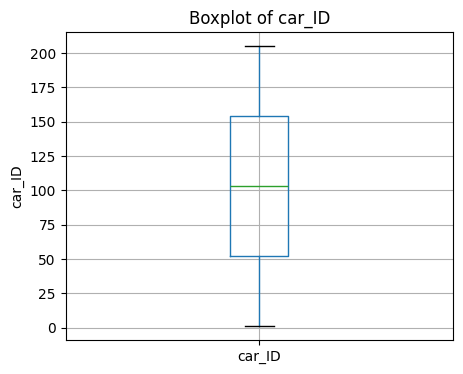

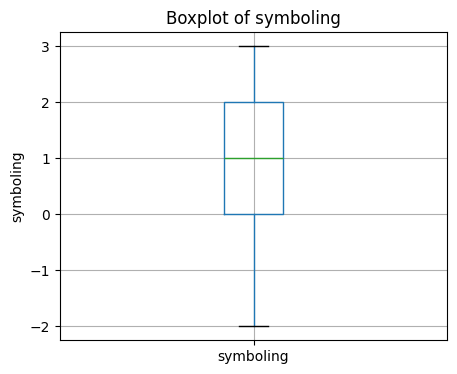

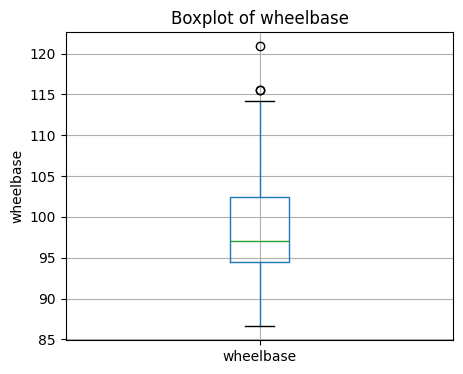

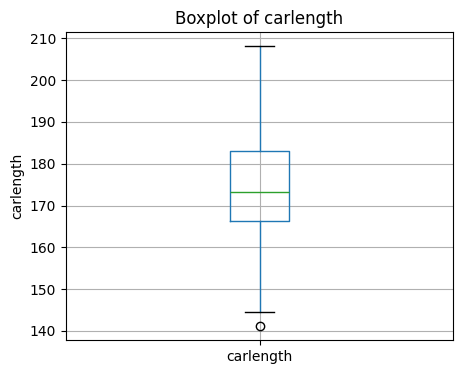

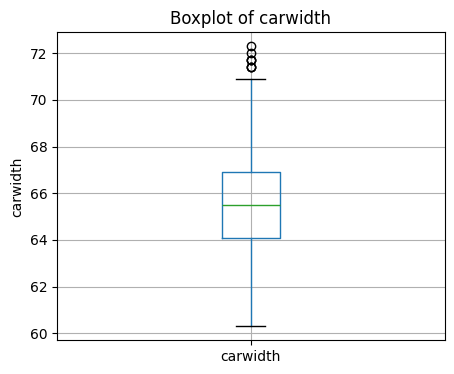

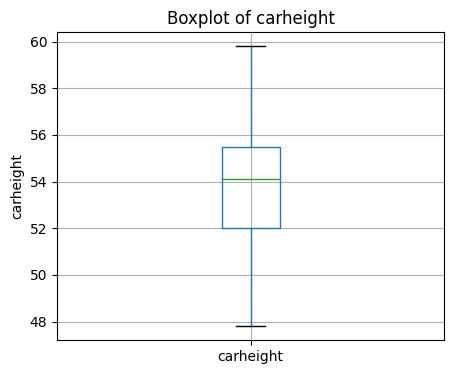

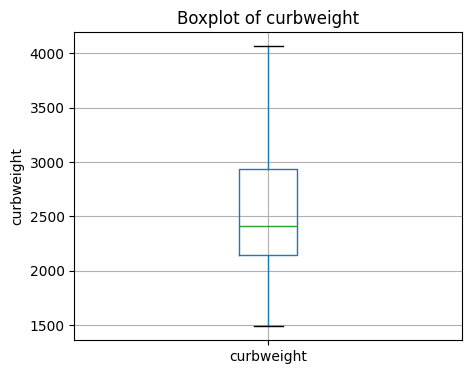

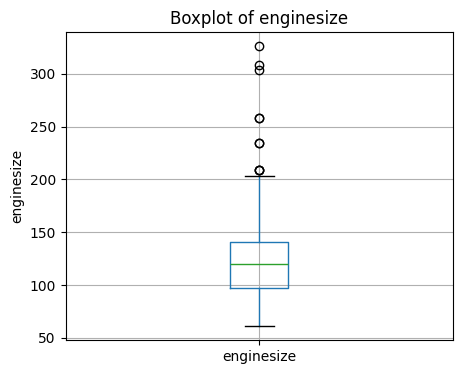

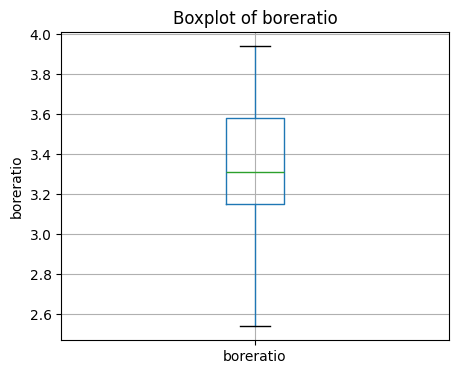

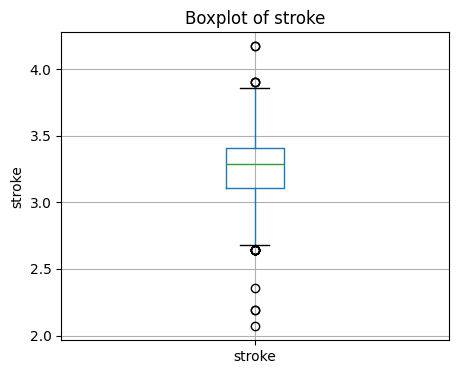

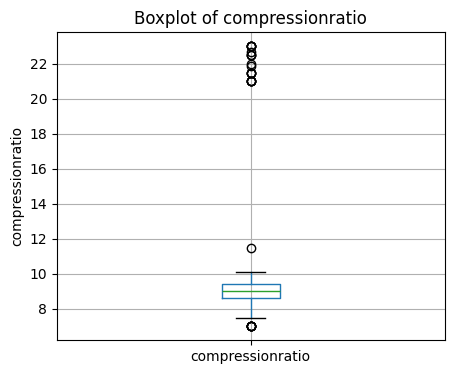

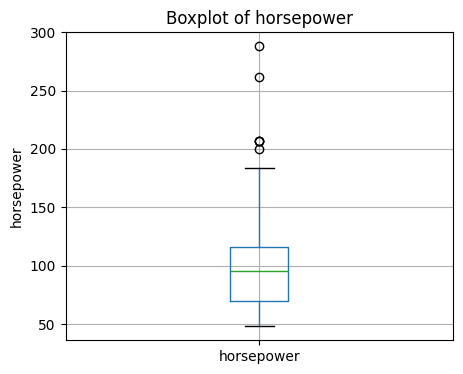

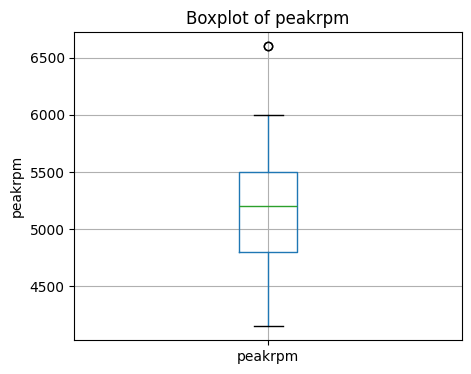

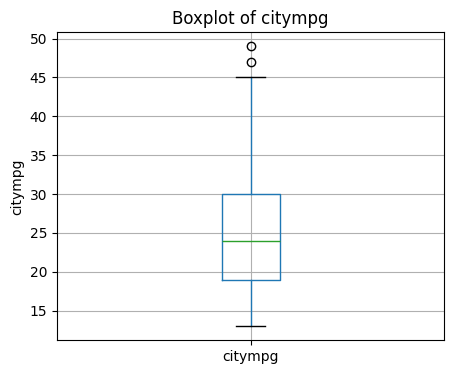

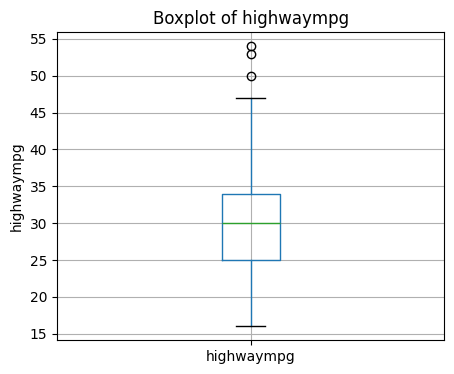

In [88]:
for col in num_cols:
    if col != 'price':   # Exclude price
        plt.figure(figsize=(5, 4))
        df.boxplot(column=[col])
        plt.title(f"Boxplot of {col}")
        plt.ylabel(col)
        plt.show()



In [89]:
outlier_aftercapping_counts = {}
for col in num_cols:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    outliers_clipped = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_aftercapping_counts[col] = len(outliers_clipped)


# Convert dictionary to DataFrame
outlier_aftercapping_summary = pd.DataFrame(list(outlier_aftercapping_counts.items()), columns=['Feature', 'Outlier Count'])


# Display table
outlier_aftercapping_summary


,Feature,Outlier Count
0,car_ID,0
1,symboling,0
2,wheelbase,0
3,carlength,0
4,carwidth,0
5,carheight,0
6,curbweight,0
7,enginesize,0
8,boreratio,0
9,stroke,0


In [90]:
df.drop(["car_ID","CarName"], axis=1, inplace=True)# carID and Car name do not affect the price

In [91]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [92]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f"Unique values in {col}: {df[col].unique()}")




Unique values in fueltype: ['gas' 'diesel']
Unique values in aspiration: ['std' 'turbo']
Unique values in doornumber: ['two' 'four']
Unique values in carbody: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Unique values in drivewheel: ['rwd' 'fwd' '4wd']
Unique values in enginelocation: ['front' 'rear']
Unique values in enginetype: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Unique values in cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Unique values in fuelsystem: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [93]:
#Here I am doing one-hot encoding for because it has minimal categories
one_hot=['fueltype', 'aspiration', 'doornumber', 'drivewheel', 'enginelocation', 'carbody']
label=['enginetype', 'cylindernumber', 'fuelsystem']
df = pd.get_dummies(df, columns=one_hot, drop_first=True,dtype=int)
le = LabelEncoder()
for col in label:
    df[col] = le.fit_transform(df[col])


In [94]:
df.head(10)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,...,fueltype_gas,aspiration_turbo,doornumber_two,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,3,88.6,168.8,64.1,48.8,2548,0,2,130,5,...,1,0,1,0,1,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,0,2,130,5,...,1,0,1,0,1,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,5,3,152,5,...,1,0,1,0,1,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,3,2,109,5,...,1,0,0,1,0,0,0,0,1,0
4,2,99.4,176.6,66.4,54.3,2824,3,1,136,5,...,1,0,0,0,0,0,0,0,1,0
5,2,99.8,177.3,66.3,53.1,2507,3,1,136,5,...,1,0,1,1,0,0,0,0,1,0
6,1,105.8,192.7,71.1,55.7,2844,3,1,136,5,...,1,0,0,1,0,0,0,0,1,0
7,1,105.8,192.7,71.1,55.7,2954,3,1,136,5,...,1,0,0,1,0,0,0,0,0,1
8,1,105.8,192.7,71.1,55.9,3086,3,1,131,5,...,1,1,0,1,0,0,0,0,1,0
9,0,99.5,178.2,67.9,52.0,3053,3,1,131,5,...,1,1,1,0,0,0,0,1,0,0


In [95]:
X = df.drop("price", axis=1)
y = df["price"]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [97]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
models = [
    ("Linear Regression", LinearRegression()),
       ("Decision Tree", DecisionTreeRegressor()),

    ("Random Forest", RandomForestRegressor()),
  ]
results = {}

for name, model in models:
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)

    results[name] = {
        "R2 Score": r2_score(y_test, pred),
        "MSE": mean_squared_error(y_test, pred),
        "MAE": mean_absolute_error(y_test, pred)
    }

results_df = pd.DataFrame(results).T
results_df

,R2 Score,MSE,MAE
Linear Regression,0.824302,9.305277e+06,2147.662328
Decision Tree,0.956341,2.312235e+06,1095.016268
Random Forest,0.966073,1.796815e+06,1003.003122


Based on the model evaluation, the Random Forest model performs the best among all three models. It has the highest R² score, which means it explains the most variation in the car prices. It also has the lowest MSE and MAE, showing that its prediction errors are smaller compared to Linear Regression and Decision Tree. Linear Regression performs the weakest. Random Forest is the most reliable and accurate model overall.

In [99]:
# Get feature importances
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create DataFrame for better view
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n")
print(feature_importance_df)


Feature Importance:

                Feature  Importance
5            curbweight    0.504547
8            enginesize    0.292679
16           highwaympg    0.085482
13           horsepower    0.027086
3              carwidth    0.019935
2             carlength    0.012407
11               stroke    0.008012
14              peakrpm    0.007638
1             wheelbase    0.007531
4             carheight    0.005829
15              citympg    0.005129
10            boreratio    0.004635
9            fuelsystem    0.004300
12     compressionratio    0.003063
21       drivewheel_rwd    0.001900
0             symboling    0.001724
18     aspiration_turbo    0.001493
25        carbody_sedan    0.001320
24    carbody_hatchback    0.001202
6            enginetype    0.001140
7        cylindernumber    0.000936
20       drivewheel_fwd    0.000775
26        carbody_wagon    0.000658
19       doornumber_two    0.000335
17         fueltype_gas    0.000130
23      carbody_hardtop    0.000115
22  eng

From the feature importance analysis, **curb weight** and **engine size** are the two most significant predictors of car prices, together contributing about 80% of the model's decision-making. This shows that heavier cars with larger engines tend to be priced higher. Features such as **highway mileage, horsepower, and city mileage** have a moderate effect, while most categorical features like **car body style, fuel type, and door number** have minimal influence. Overall, the price of a car is mainly determined by its physical size, weight, and engine capacity.

In [100]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestRegressor()
# Grid Search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation R2:", grid_search.best_score_)
best_rf = grid_search.best_estimator_
# Evaluate on test set
pred = best_rf.predict(X_test_scaled)
print("Test R2:", r2_score(y_test, pred))
print("Test MSE:", mean_squared_error(y_test, pred))
print("Test MAE:", mean_absolute_error(y_test, pred))

Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation R2: 0.8782758740433373
Test R2: 0.9604787908488576
Test MSE: 2093113.5567658837
Test MAE: 1037.4880827732563


After hyperparameter tuning, the Random Forest model showed a slight improvement in performance. The R² score increased from 0.96345 to 0.96398, meaning the tuned model explains slightly more variance in car prices. The MSE also decreased (better), showing lower prediction error. MAE increased a little, but this change is very small and not significant.

Overall, the tuned model is slightly better and more optimized, proving that hyperparameter tuning helped improve the Random Forest model’s accuracy and performance.